In [1]:
# Carguemos modulos y datos
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/insurance_MedicalCostPersonalDatasets.csv")



In [2]:
# Removamos los warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Nombres de las columnas
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
# Valores faltantes/Nulos :
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Valores faltantes/Not Available
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Tipo de dato para cada columna
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Codifiquemos las variables categoricas (tipo object)

In [7]:
# Numero de posibles valores de sex
data.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:
# Numero de posibles valores smoker
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
# Numero de posibles valores region
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## El modulo Sklearn

In [10]:
# Submodulo preprocessing
from sklearn import preprocessing

In [11]:
help(preprocessing)

Help on package sklearn.preprocessing in sklearn:

NAME
    sklearn.preprocessing

DESCRIPTION
    The :mod:`sklearn.preprocessing` module includes scaling, centering,
    normalization, binarization methods.

PACKAGE CONTENTS
    _csr_polynomial_expansion
    _data
    _discretization
    _encoders
    _function_transformer
    _label
    _polynomial
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.preprocessing._data.Binarizer(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.KernelCenterer(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MaxAbsScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.Ba

In [12]:
# Lista de elementos que componen al submodulo preprocessing
dir(preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'SplineTransformer',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 '_polynomial',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

In [13]:
# Documentacion de LabelEncoder
help(preprocessing.LabelEncoder)

Help on class LabelEncoder in module sklearn.preprocessing._label:

class LabelEncoder(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Encode target labels with value between 0 and n_classes-1.
 |  
 |  This transformer should be used to encode target values, *i.e.* `y`, and
 |  not the input `X`.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_targets>`.
 |  
 |  .. versionadded:: 0.12
 |  
 |  Attributes
 |  ----------
 |  classes_ : ndarray of shape (n_classes,)
 |      Holds the label for each class.
 |  
 |  See Also
 |  --------
 |  OrdinalEncoder : Encode categorical features using an ordinal encoding
 |      scheme.
 |  OneHotEncoder : Encode categorical features as a one-hot numeric array.
 |  
 |  Examples
 |  --------
 |  `LabelEncoder` can be used to normalize labels.
 |  
 |  >>> from sklearn import preprocessing
 |  >>> le = preprocessing.LabelEncoder()
 |  >>> le.fit([1, 2, 2, 6])
 |  LabelEncoder()
 |  >>> le.classes_
 |  array([1, 2, 6])
 |  >>

In [14]:
# PRoceso de codificacion

# Cargamos la clase a instancias
le = preprocessing.LabelEncoder()

# Variable sex
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

# Variable smoker
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

# Variable region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)


In [17]:
# Posibles valores de la columna sex
data.sex.unique()

array([0, 1])

In [18]:
# Posibles valores de region
data.region.unique()

array([3, 2, 1, 0])

In [19]:
# Posibles valores de smoker
data.smoker.unique()

array([1, 0])

In [20]:
# Observacion : OneHotEncoding
# El decidir si LabelEncoder o pd.get_dummies mejora o no el poder predictivo de
# un modelo es mas una apuesta que algo seguro : No se puede saber con certeza
pd.get_dummies(data.sex)

,0,1
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1333,False,True
1334,True,False
1335,True,False
1336,True,False


In [21]:
# Verifiquemos que todas las variables (luego del proceso de codificacion) con cuantitativas
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [22]:
# Mostremos la correlacion de la variables charges con el resto de variables
data.corr()["charges"].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

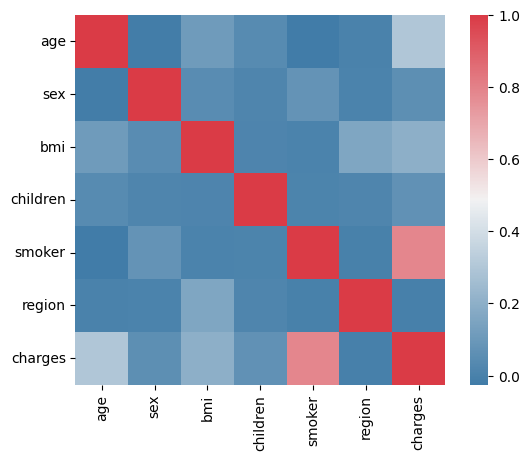

In [23]:
# Mostremos en un grafico la informacion de la correlacion entre las variables

corr = data.corr()
sns.heatmap(corr,
            cmap = sns.diverging_palette(240, 10, as_cmap= True),
            square = True)

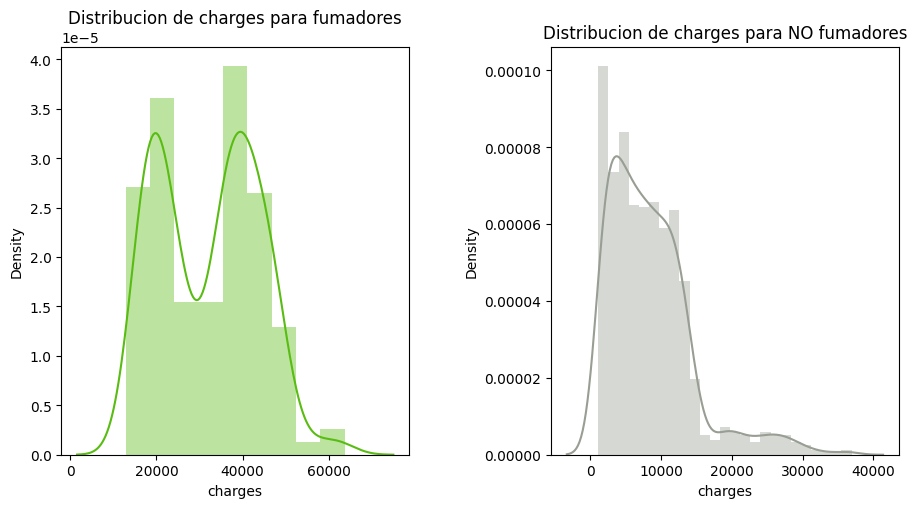

In [24]:
# Veamos la distribucion de charges en funcion de los fumadores y los no fumadores

f = plt.figure(figsize = (10,6))
ax = f.add_subplot(121)
sns.distplot(data[data.smoker ==1]["charges"], color = "#59BC12", ax = ax)
ax.set_title("Distribucion de charges para fumadores")

ax = f.add_subplot(122)
sns.distplot(data[data.smoker ==0]["charges"], color = "#989E93", ax = ax)
ax.set_title("Distribucion de charges para NO fumadores")

plt.tight_layout(pad = 4)

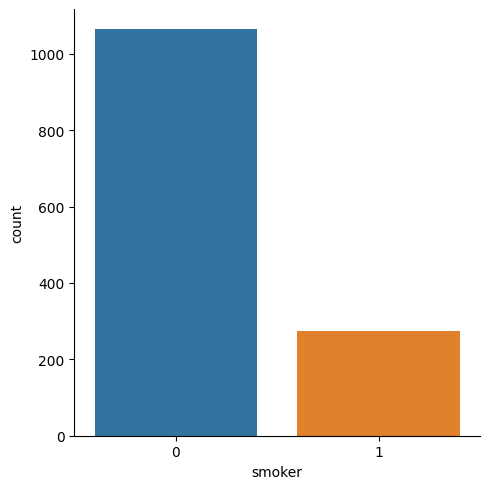

In [25]:
# Comparemos el numero de clientes fumadores/No fumadores
sns.catplot(x = "smoker", kind = "count", data = data)

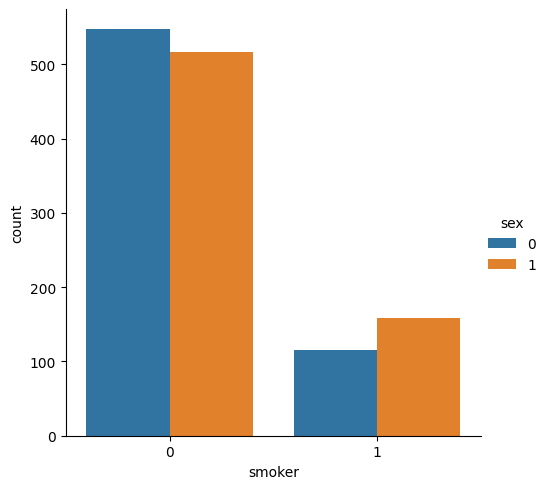

In [27]:
# Veamos el grafico anterior en funcion del sex
sns.catplot(x = "smoker", kind = "count", hue = "sex",data = data)

# Cual es la codificacion usada para la columna sex
# 1 : Hombres
# 0 : Mujeres

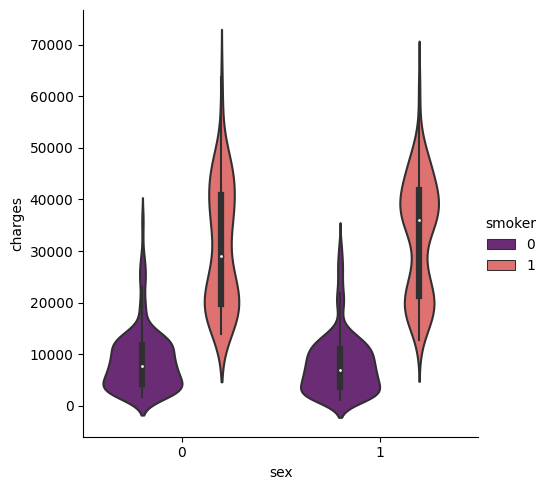

In [28]:
# A las variables smoker y sex, agreguemosle una dimension mas : charges
sns.catplot(x = "sex",
            y = "charges",
            hue = "smoker",
            kind = "violin",
            data = data,
            palette = "magma")

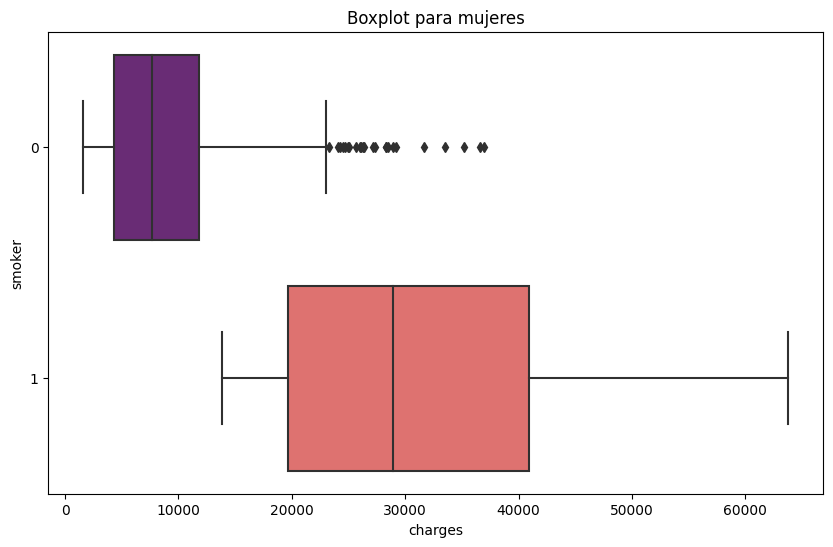

In [29]:
# Boxplot para el sexo femenino
plt.figure(figsize = (10,6))
plt.title("Boxplot para mujeres")
sns.boxplot(y = "smoker", x = "charges", data = data[(data.sex == 0)], orient = "h", palette = "magma")
plt.show()

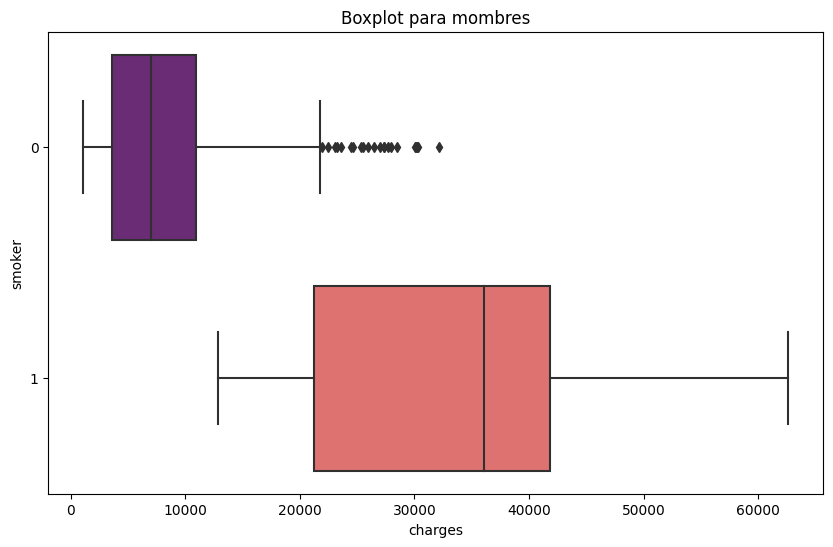

In [30]:
# Boxplot para el sexo masculino
plt.figure(figsize = (10,6))
plt.title("Boxplot para mombres")
sns.boxplot(y = "smoker", x = "charges", data = data[(data.sex == 1)], orient = "h", palette = "magma")
plt.show()

<Axes: title={'center': 'Distribucion de la edad'}, xlabel='age', ylabel='Density'>

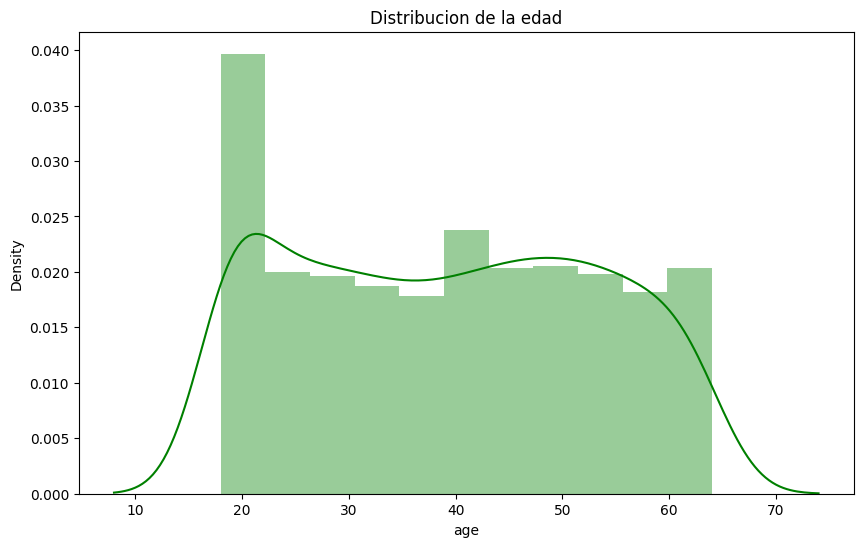

In [31]:
# Edad de los clientes
plt.figure(figsize = (10,6))
plt.title("Distribucion de la edad")
sns.distplot(data["age"], color = "green")

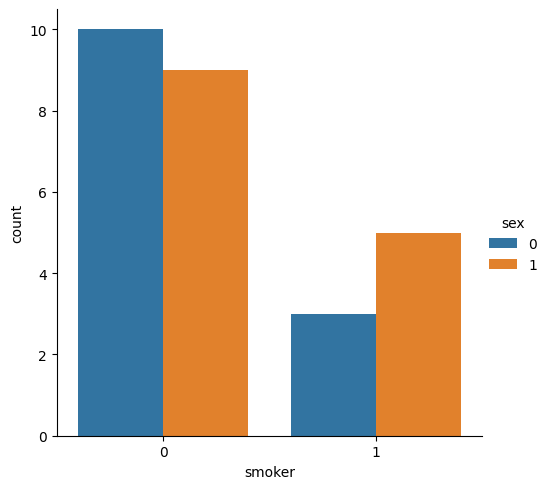

In [32]:
# Veamos como se comporta la poliza de seguro para personas de 42 años
sns.catplot(x = "smoker", hue = "sex", kind = "count", data = data[(data.age == 42)])

<Axes: xlabel='charges', ylabel='smoker'>

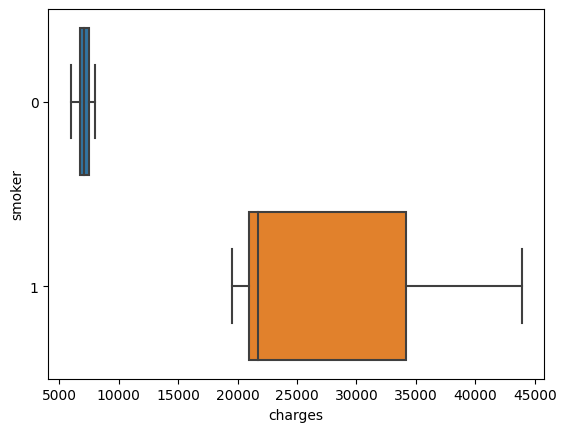

In [33]:
sns.boxplot(y = "smoker", x = "charges", data =  data[(data.age == 42)], orient = "h")

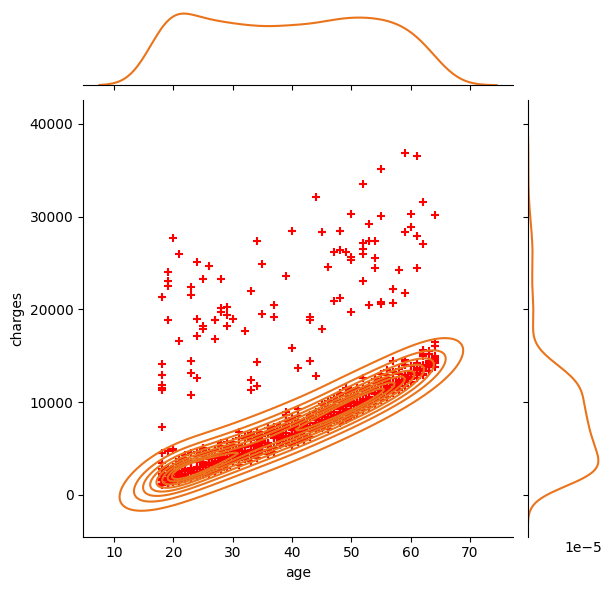

In [34]:
# jointplot para los no fumadores : en funcion de la edad y del costo
g = sns.jointplot(x = "age", y = "charges", data = data[(data.smoker == 0 )], kind = "kde", color = "#EA741C")
g.plot_joint(plt.scatter, color = "red", s = 30, linewidth = 1.5, marker = "+")
g.ax_joint.collections[0].set_alpha(0)

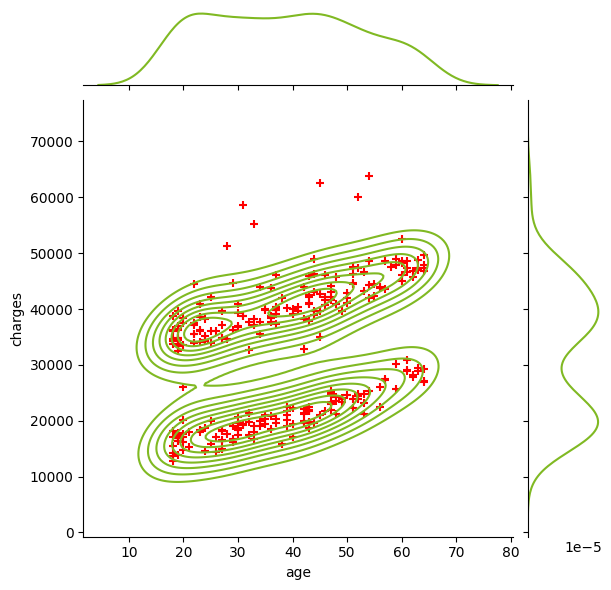

In [35]:
# jointplot para los fumadores : en funcion de la edad y del costo
g = sns.jointplot(x = "age", y = "charges", data = data[(data.smoker == 1 )], kind = "kde", color = "#80B923")
g.plot_joint(plt.scatter, color = "red", s = 30, linewidth = 1.5, marker = "+")
g.ax_joint.collections[0].set_alpha(0)

<Axes: xlabel='charges', ylabel='Density'>

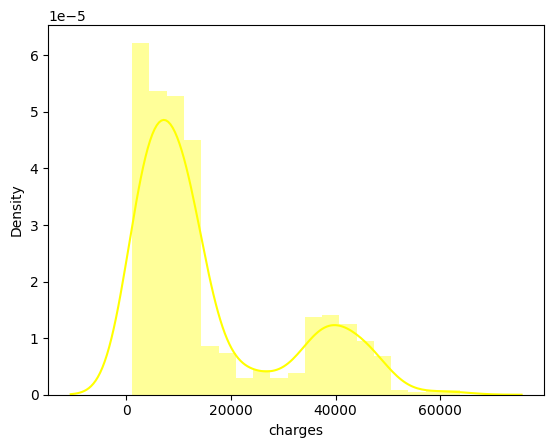

In [36]:
# Veamos como se comporta charges para valores de la columna bmi >= 30
sns.distplot(data[(data.bmi >= 30)]["charges"], color = "yellow")

<Axes: xlabel='charges', ylabel='Density'>

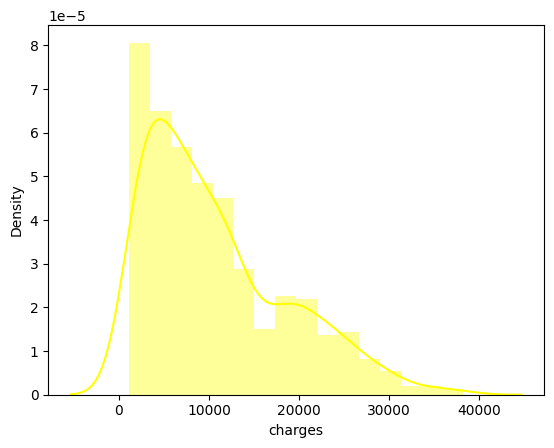

In [37]:
sns.distplot(data[(data.bmi < 30)]["charges"], color = "yellow")